Pandas functions for Time Series Data

* Data Time Index
* Time Resampling
* Time Shifting
* Simple Moving Average (Rolling)
* Expanding
* Plotting

In [ ]:
import pandas as pd
import datetime as datetime

## Date Time Index

In [ ]:
my_dates = ['04/07/2025', '05/07/2025','06/07/2025']
my_dates

['04/07/2025', '05/07/2025', '06/07/2025']

In [ ]:
a = pd.to_datetime(my_dates, format="%d/%m/%Y")
a

DatetimeIndex(['2025-07-04', '2025-07-05', '2025-07-06'], dtype='datetime64[ns]', freq=None)

In [ ]:
a.month

Index([7, 7, 7], dtype='int32')

In [ ]:
a.year

Index([2025, 2025, 2025], dtype='int32')

In [ ]:
a.day

Index([4, 5, 6], dtype='int32')

In [ ]:
a.hour

Index([0, 0, 0], dtype='int32')

In [ ]:
import gdown
gdown.download("https://drive.google.com/uc?id=1ugXf9514sOZx5izMY7Mt6_HX8doCQLcO")

Downloading...
From: https://drive.google.com/uc?id=1ugXf9514sOZx5izMY7Mt6_HX8doCQLcO
To: /content/Preprocessing3.csv
100%|██████████| 919k/919k [00:00<00:00, 42.4MB/s]


'Preprocessing3.csv'

In [ ]:
df = pd.read_csv("/content/Preprocessing3.csv")
df.head()

,Date,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face
0,2009-01-02,2009,Greenwich,NaN,5187000.0,?,Detached House,3,2,1026.0,1.025953,South
1,2009-01-02,2009,Norwalk,NaN,480000.0,Single Family,Detached House,3,2,1051.0,1.025953,West
2,2009-01-02,2009,Waterbury,57890.0,152000.0,Single Family,Detached House,3,2,943.0,1.025953,East
3,2009-01-02,2009,NaN,44520.0,60000.0,Single Family,Detached House,3,2,1099.0,1.025953,North
4,2009-01-03,2009,Bridgeport,91071.0,250000.0,Two Family,Duplex,4,2,1213.0,1.025953,South


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   Year               10000 non-null  int64  
 2   Locality           8715 non-null   object 
 3   Estimated Value    8719 non-null   float64
 4   Sale Price         10000 non-null  float64
 5   Property           10000 non-null  object 
 6   Residential        10000 non-null  object 
 7   num_rooms          10000 non-null  int64  
 8   num_bathrooms      10000 non-null  int64  
 9   carpet_area        8718 non-null   float64
 10  property_tax_rate  10000 non-null  float64
 11  Face               10000 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 937.6+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Date'].max()

Timestamp('2022-09-30 00:00:00')

In [ ]:
df['Date'].min()

Timestamp('2009-01-02 00:00:00')

In [ ]:
df['Date'].dt.day

,Date
0,2
1,2
2,2
3,2
4,3
...,...
9995,30
9996,30
9997,30
9998,30


In [ ]:
df['Date'].dt.month

,Date
0,1
1,1
2,1
3,1
4,1
...,...
9995,9
9996,9
9997,9
9998,9


### Take date feature and extract day month year from that

In [ ]:
new_df = pd.DataFrame(df['Date'])
new_df.head()

,Date
0,2009-01-02
1,2009-01-02
2,2009-01-02
3,2009-01-02
4,2009-01-03


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.3 KB


In [ ]:
new_df['day'] = new_df['Date'].dt.day
new_df['month'] = new_df["Date"].dt.month
new_df['year'] = new_df['Date'].dt.year
new_df

,Date,day,month,year
0,2009-01-02,2,1,2009
1,2009-01-02,2,1,2009
2,2009-01-02,2,1,2009
3,2009-01-02,2,1,2009
4,2009-01-03,3,1,2009
...,...,...,...,...
9995,2022-09-30,30,9,2022
9996,2022-09-30,30,9,2022
9997,2022-09-30,30,9,2022
9998,2022-09-30,30,9,2022


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10000 non-null  datetime64[ns]
 1   day     10000 non-null  int32         
 2   month   10000 non-null  int32         
 3   year    10000 non-null  int32         
dtypes: datetime64[ns](1), int32(3)
memory usage: 195.4 KB


In [ ]:
import yfinance as yf
ticker_symbol = 'RELIANCE.NS'
stock_data = yf.download(ticker_symbol, start= '2024-01-01', end='2025-08-01', interval='1d')
stock_data

/tmp/ipython-input-3855116458.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker_symbol, start= '2024-01-01', end='2025-08-01', interval='1d')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2024-01-01,1285.609741,1293.848810,1277.122509,1280.795398,4030540
2024-01-02,1296.255859,1297.893761,1277.048049,1283.003966,7448800
2024-01-03,1282.160156,1307.323883,1279.132516,1295.412048,9037536
2024-01-04,1288.786011,1295.337617,1280.075579,1284.492835,9612778
2024-01-05,1294.270508,1300.300947,1289.456165,1291.888117,8086406
...,...,...,...,...,...
2025-07-25,1386.163696,1395.426749,1378.593954,1393.335127,11854722
2025-07-28,1382.080078,1402.199795,1379.490445,1386.761454,7748361


In [ ]:
import yfinance as yf
ticket_symbol = 'RELIANCE.NS'
stock_data = yf.download(ticket_symbol, period='3mo', interval='1d')
stock_data

/tmp/ipython-input-1621892955.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticket_symbol, period='3mo', interval='1d')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2025-07-15,1479.491089,1490.546909,1476.503023,1480.287834,8132454
2025-07-16,1479.690186,1485.068728,1465.646300,1467.140333,10409983
2025-07-17,1470.526855,1483.674297,1468.036801,1481.483097,11854613
2025-07-18,1470.128418,1478.893460,1463.255842,1478.893460,10296318
2025-07-21,1422.916992,1470.128459,1417.438871,1459.172217,22442744
...,...,...,...,...,...
2025-10-09,1377.800049,1380.000000,1369.099976,1374.000000,8826633
2025-10-10,1381.699951,1388.000000,1375.099976,1377.800049,6373084


<Axes: xlabel='Date'>

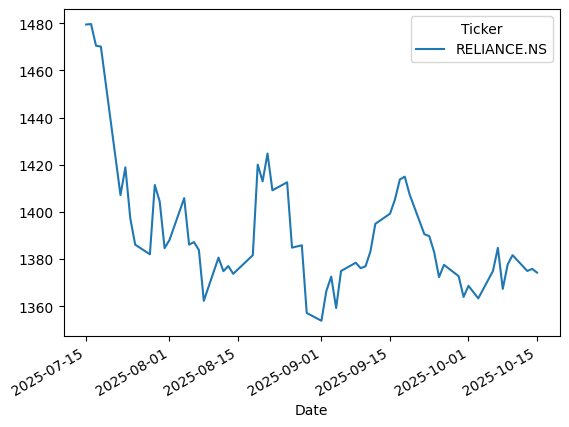

In [ ]:
stock_data["Close"].plot()

In [ ]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.8 MB/s eta 0:00:00


In [ ]:
stock_data.isna().sum()

,,0
Price,Ticker,
Close,RELIANCE.NS,0
High,RELIANCE.NS,0
Low,RELIANCE.NS,0
Open,RELIANCE.NS,0
Volume,RELIANCE.NS,0


In [ ]:
stock_data.index

DatetimeIndex(['2025-07-15', '2025-07-16', '2025-07-17', '2025-07-18',
               '2025-07-21', '2025-07-22', '2025-07-23', '2025-07-24',
               '2025-07-25', '2025-07-28', '2025-07-29', '2025-07-30',
               '2025-07-31', '2025-08-01', '2025-08-04', '2025-08-05',
               '2025-08-06', '2025-08-07', '2025-08-08', '2025-08-11',
               '2025-08-12', '2025-08-13', '2025-08-14', '2025-08-18',
               '2025-08-19', '2025-08-20', '2025-08-21', '2025-08-22',
               '2025-08-25', '2025-08-26', '2025-08-28', '2025-08-29',
               '2025-09-01', '2025-09-02', '2025-09-03', '2025-09-04',
               '2025-09-05', '2025-09-08', '2025-09-09', '2025-09-10',
               '2025-09-11', '2025-09-12', '2025-09-15', '2025-09-16',
               '2025-09-17', '2025-09-18', '2025-09-19', '2025-09-22',
               '2025-09-23', '2025-09-24', '2025-09-25', '2025-09-26',
               '2025-09-29', '2025-09-30', '2025-10-01', '2025-10-03',
      

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64 entries, 2025-07-15 to 2025-10-15
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Close, RELIANCE.NS)   64 non-null     float64
 1   (High, RELIANCE.NS)    64 non-null     float64
 2   (Low, RELIANCE.NS)     64 non-null     float64
 3   (Open, RELIANCE.NS)    64 non-null     float64
 4   (Volume, RELIANCE.NS)  64 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 3.0 KB


In [ ]:
stock_data.columns = stock_data.columns.droplevel("Ticker")

In [ ]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2025-07-15,1479.491089,1490.546909,1476.503023,1480.287834,8132454
2025-07-16,1479.690186,1485.068728,1465.646300,1467.140333,10409983
2025-07-17,1470.526855,1483.674297,1468.036801,1481.483097,11854613
2025-07-18,1470.128418,1478.893460,1463.255842,1478.893460,10296318
2025-07-21,1422.916992,1470.128459,1417.438871,1459.172217,22442744


In [ ]:
import mplfinance as mpf

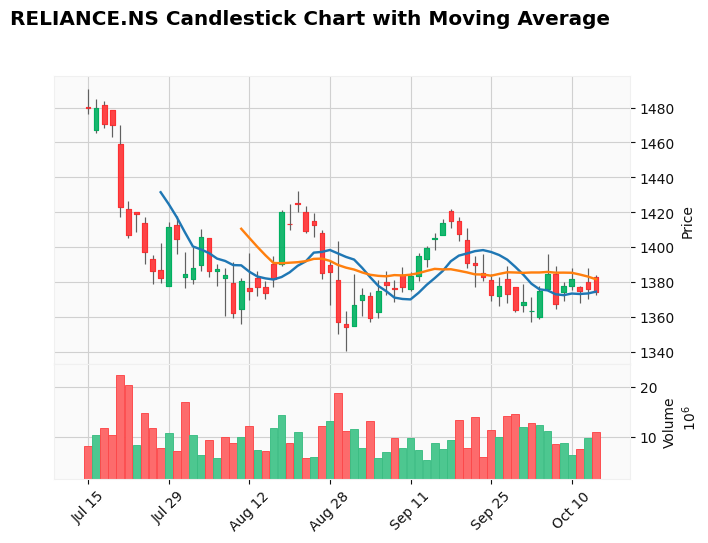

In [ ]:
# Plot candlestick chart with 10-day and 20-day moving averages

mpf.plot(
    stock_data,
    type = 'candle',
    style = 'yahoo',
    title = f'{ticker_symbol} Candlestick Chart with Moving Average',
    mav=(10,20),
    volume = True,
    ylabel = 'Price',
    ylabel_lower = 'Volume'
)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=stock_data.index,
                                     open=stock_data['Open'],
                                     high=stock_data['High'],
                                     low = stock_data['Low'],
                                     close = stock_data['Close'])])

fig.update_layout(title='Candlestick Chart',
                  xaxis_title = 'Date',
                  yaxis_title='Price')

fig.show()